In [54]:
import keras
import numpy as np
import pandas as pd
from keras import optimizers
from keras.layers import Dense, Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [18]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy=[]

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))

In [48]:
results=[]

In [2]:
mnsit_data = pd.read_csv('resources/train.csv')
mnsit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = mnsit_data.values
train.shape

X = train[:, 1:]
X = X.astype(np.float32)
y = train[:, 0]
Y = to_categorical(y, num_classes=10)

print(X.shape, y.shape, Y.shape)

(42000, 784) (42000,) (42000, 10)


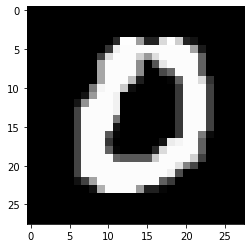

In [5]:
img = train[3401][1:]
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

In [85]:
model = keras.Sequential()
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.adam(learning_rate=0.001, beta_1=0.5, beta_2=0.5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_result = model.fit(X, Y, epochs=20, batch_size=64)


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_66 (Dense)             (None, 10)                1010      
Total params: 29,430
Trainable params: 29,430
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
42000/42000 [==============================] - 4s 86us/step - loss: 2.0131 - accuracy: 0.7917
Epoch 2/20
42000/42000 [==============================] - 3s 72us/step - loss: 0.5397 - accuracy: 0.9016
Epoch 3/20
42000/42000 [==============================] - 3s 68us/step - loss: 0.4743 - accuracy: 0.9223
Epoch 4/20
42000/42000 [==============================] - 3s 68u

In [87]:
results.append(model_result)


In [91]:
labels= ['sgd', 'sgd Momentum','Adagrad', 'RMSprop','Adam', 
         'Adagrad lr=1e-3','Adagrad lr=1e-1','Adam b1,b2=0.5']

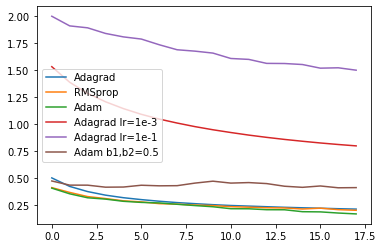

In [94]:
for i,result in enumerate(results[2:]):  
    plt.plot(result.history['loss'][2:], label=labels[2:][i])
    plt.legend()

In [90]:
del results[-2]
results